In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

data = pd.read_csv('facebook_train.csv')

In [3]:
train_data = []
length = len(data.type)

for i in range(length):
    initial = []
    initial.append(data.total_followers[i])
    type_ = data.type[i]
    if type_ == 'Photo':
        initial.append(0)
    elif type == 'Link':
        initial.append(1)
    else:
        initial.append(2)
    initial.append(data.category[i])
    initial.append(data.month[i])
    initial.append(data.weekday[i])
    initial.append(data.paid[i])
    train_data.append(initial)

In [4]:
target_data_comment = np.array(data.comment).reshape(-1,1)
target_data_like = np.array(data.like).reshape(-1,1)
target_data_share = np.array(data.share).reshape(-1,1)

In [5]:
from sklearn import linear_model
reg_comment = linear_model.LinearRegression()
reg_like = linear_model.LinearRegression()
reg_share = linear_model.LinearRegression()

reg_comment.fit(train_data,target_data_comment)
reg_like.fit(train_data,target_data_like)
reg_share.fit(train_data,target_data_share)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
comment_prediction = reg_comment.predict(train_data)
like_prediction = reg_like.predict(train_data)
share_prediction = reg_share.predict(train_data)

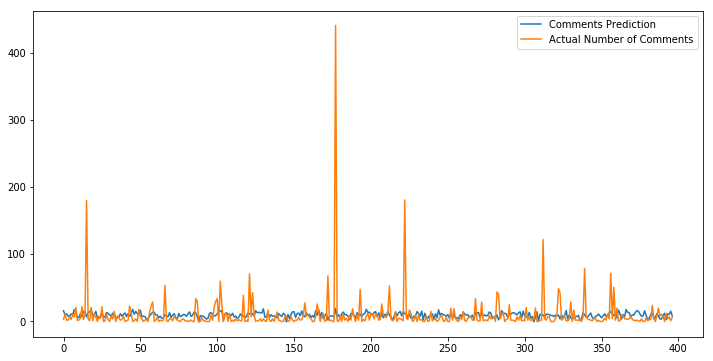

[[ 4.45904824e-04 -3.63258851e-01  4.28548811e-01 -2.03218153e+00
   8.41036233e-01  4.51085537e+00]]


In [7]:
plt.figure(figsize =(12,6))
plt.plot(range(length),comment_prediction,label='Comments Prediction')
plt.plot(range(length),data.comment,label='Actual Number of Comments')
plt.legend()
plt.show()
print(reg_comment.coef_)

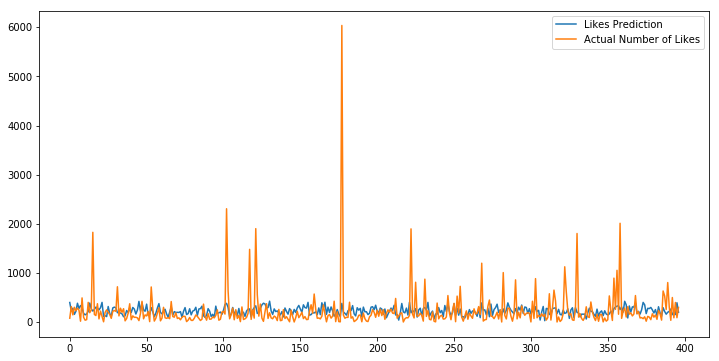

[[ 4.11884015e-03 -1.69304287e+01  5.92393213e+01 -1.39893664e+01
   7.42381125e+00  1.13645994e+02]]


In [8]:
plt.figure(figsize =(12,6))
plt.plot(range(length),like_prediction,label='Likes Prediction')
plt.plot(range(length),data.like,label='Actual Number of Likes')
plt.legend()
plt.show()
print(reg_like.coef_)

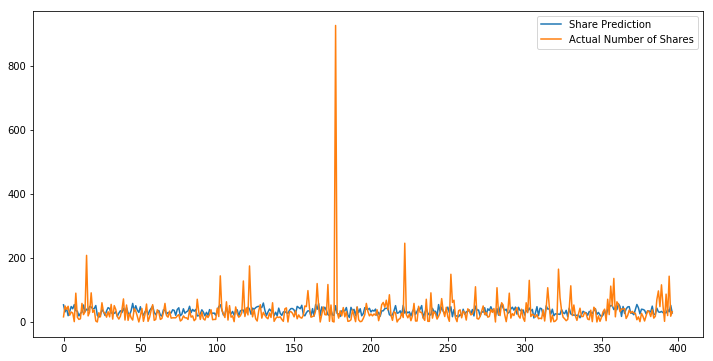

[[ 4.65567361e-04  2.62432452e+00  9.19336161e+00 -2.31028691e+00
   1.72708136e+00  1.04473303e+01]]


In [9]:
plt.figure(figsize =(12,6))
plt.plot(range(length),share_prediction,label='Share Prediction')
plt.plot(range(length),data.share,label='Actual Number of Shares')
plt.legend()
plt.show()
print(reg_share.coef_)

In [10]:
test = pd.read_csv('facebook_test.csv')

test_data = []
length2 = len(test.type)

for i in range(length2):
    initial = []
    initial.append(test.total_followers[i])
    type_ = test.type[i]
    if type_ == 'Photo':
        initial.append(0)
    elif type == 'Link':
        initial.append(1)
    else:
        initial.append(2)
    initial.append(test.category[i])
    initial.append(test.month[i])
    initial.append(test.weekday[i])
    initial.append(test.paid[i])
    test_data.append(initial)

In [11]:
comment_prediction2 = reg_comment.predict(test_data)
like_prediction2 = reg_like.predict(test_data)
share_prediction2 = reg_share.predict(test_data)

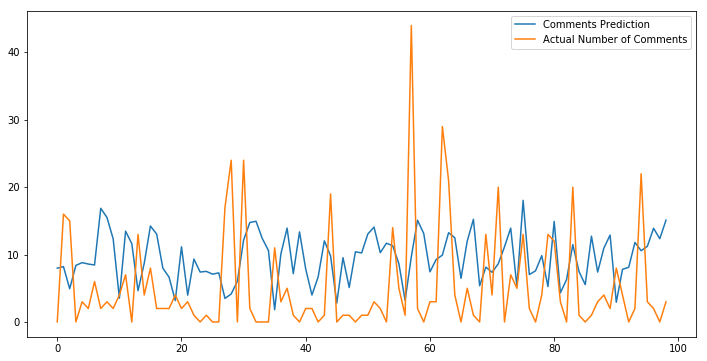

In [12]:
plt.figure(figsize =(12,6))
plt.plot(range(length2),comment_prediction2,label='Comments Prediction')
plt.plot(range(length2),test.comment,label='Actual Number of Comments')
plt.legend()
plt.show()

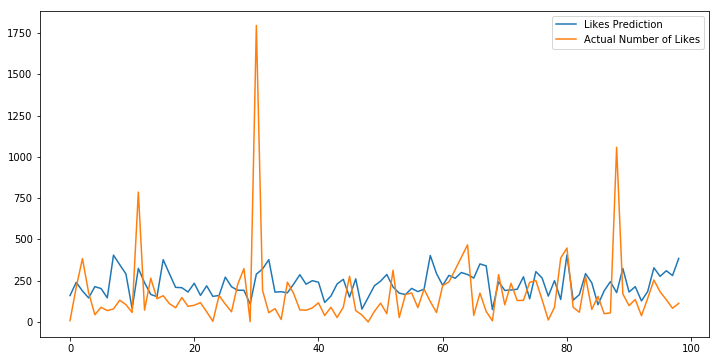

In [13]:
plt.figure(figsize =(12,6))
plt.plot(range(length2),like_prediction2,label='Likes Prediction')
plt.plot(range(length2),test.like,label='Actual Number of Likes')
plt.legend()
plt.show()

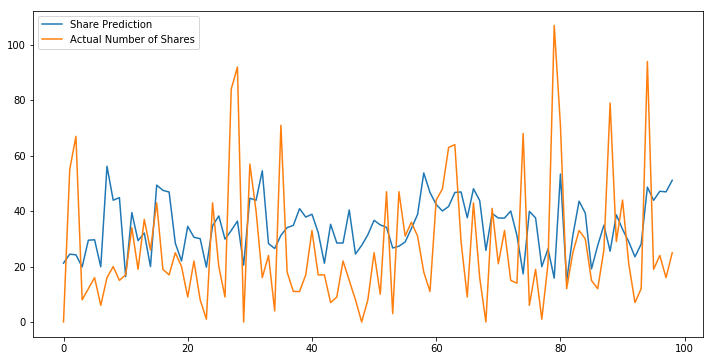

In [14]:
plt.figure(figsize =(12,6))
plt.plot(range(length2),share_prediction2,label='Share Prediction')
plt.plot(range(length2),test.share,label='Actual Number of Shares')
plt.legend()
plt.show()

# 3.1 Model Quality Metrics

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error, r2_score

In [24]:
print(mean_squared_error(like_prediction2,test.like))
print(mean_absolute_error(like_prediction2,test.like))
print(median_absolute_error(like_prediction2,test.like))
print(r2_score(like_prediction2,test.like))

52989.732782804596
148.2109612344904
130.17629862087085
-8.341371746314765


In [25]:
print(mean_squared_error(comment_prediction2,test.comment))
print(mean_absolute_error(comment_prediction2,test.comment))
print(median_absolute_error(comment_prediction2,test.comment))
print(r2_score(comment_prediction2,test.comment))

90.12885198545474
8.27227106671653
7.752759682510899
-5.809891339727699


In [26]:
print(mean_squared_error(share_prediction2,test.share))
print(mean_absolute_error(share_prediction2,test.share))
print(median_absolute_error(share_prediction2,test.share))
print(r2_score(share_prediction2,test.share))

591.508293594853
19.501537127976484
17.611935420919913
-5.215494401199972


# Question 2

In [28]:
import pandas
c_train = pandas.read_csv("casualty_train.csv")
c_test = pandas.read_csv("casualty_test.csv")

# clean data
# drop 16225 observation that don't have age
c_train = c_train[c_train["age"] != "Unknown"]
c_test = c_test[c_test["age"] != "Unknown"]

# severe
c_train.loc[c_train["severe"] == False, "severe"] = 0
c_train.loc[c_train["severe"] == True, "severe"] = 1

c_test.loc[c_test["severe"] == False, "severe"] = 0
c_test.loc[c_test["severe"] == True, "severe"] = 1

c_train = pandas.get_dummies(c_train, dummy_na=True, columns=["casualty_class", "gender", "pedestrian_location", "pedestrian_movement", "travel"])
c_test = pandas.get_dummies(c_test, dummy_na=True, columns=["casualty_class", "gender", "pedestrian_location", "pedestrian_movement", "travel"])
# # convert the text categories to int labels

In [29]:
print(c_train)

       age  severe  year  casualty_class_driver  casualty_class_passenger  \
0       33       0  2007                      0                         1   
1       20       0  2005                      0                         1   
2       52       0  2006                      0                         1   
3       17       0  2012                      0                         1   
4       20       0  2010                      0                         1   
5       40       1  2008                      0                         0   
6       40       0  2005                      0                         1   
7       23       0  2007                      0                         1   
8       45       0  2006                      1                         0   
9        8       0  2010                      0                         0   
10       8       0  2006                      1                         0   
11       7       0  2005                      0                         1   

In [39]:
train_final = []
length = len(c_train.severe)
indexes = c_train.index

for i in indexes:
    initial = []
    initial.append(c_train.age[i])
    initial.append(c_train.casualty_class_driver[i])
    initial.append(c_train.casualty_class_passenger[i])
    initial.append(c_train.casualty_class_pedestrian[i])
    initial.append(c_train.casualty_class_nan[i])
    initial.append(c_train.gender_female[i])
    initial.append(c_train.gender_male[i])
    initial.append(c_train.gender_nan[i])
    initial.append(c_train.pedestrian_movement_nan[i])
    initial.append(c_train.travel_bicycle[i])
    initial.append(c_train.travel_bus[i])
    initial.append(c_train.travel_car[i])
    initial.append(c_train.travel_motorbike[i])
    initial.append(c_train.travel_other[i])
    initial.append(c_train.travel_pedestrian[i])
    initial.append(c_train.travel_taxi[i])
    initial.append(c_train.travel_nan[i])
    train_final.append(initial)

In [40]:
test_final = []
length = len(c_test.severe)
indexes = c_test.index

for i in indexes:
    initial = []
    initial.append(c_test.age[i])
    initial.append(c_test.casualty_class_driver[i])
    initial.append(c_test.casualty_class_passenger[i])
    initial.append(c_test.casualty_class_pedestrian[i])
    initial.append(c_test.casualty_class_nan[i])
    initial.append(c_test.gender_female[i])
    initial.append(c_test.gender_male[i])
    initial.append(c_test.gender_nan[i])
    initial.append(c_test.pedestrian_movement_nan[i])
    initial.append(c_test.travel_bicycle[i])
    initial.append(c_test.travel_bus[i])
    initial.append(c_test.travel_car[i])
    initial.append(c_test.travel_motorbike[i])
    initial.append(c_test.travel_other[i])
    initial.append(c_test.travel_pedestrian[i])
    initial.append(c_test.travel_taxi[i])
    initial.append(c_test.travel_nan[i])
    test_final.append(initial)

In [41]:
train_target = np.array(c_train.severe).reshape(-1,1)

In [42]:
test_target = np.array(c_test.severe).reshape(-1,1)

In [45]:
from sklearn import datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def k_nearest_neighbor(k, data_test, target_test, data_train, target_train):
    
    model = KNeighborsClassifier(n_neighbors=k)  
    model.fit(data_train, target_train)
    prediction = model.predict(data_test) 
    
    print(classification_report(target_test, prediction))

# 3.1 Metrics

In [46]:
k_nearest_neighbor(5,test_final,test_target,train_final,train_target)

/Users/sohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


             precision    recall  f1-score   support

          0       0.89      0.98      0.94     48369
          1       0.19      0.03      0.05      5908

avg / total       0.82      0.88      0.84     54277

